In [9]:
import sys
import copy
sys.path.append('/home/igudich/work/mantid-benchmarks/python/')
from generic_tree import Node, apply_multiple_trees

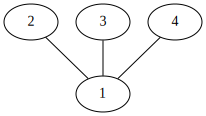

In [10]:
root = Node(["1", 1])
root.append(Node(["2", 2]))
root.append(Node(["3", 3]))
root.append(Node(["4", 4]))
root.to_dot()

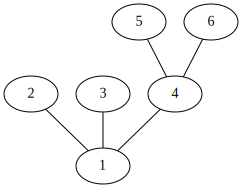

In [11]:
node = root.find_first(lambda x: x[0]=="4")
node.append(Node(["5", 5]))
node.append(Node(["6", 6]))
root.to_dot()

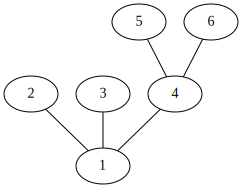

In [12]:
root2 = root.clone()
root2.to_dot()

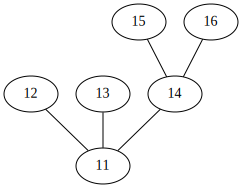

In [13]:
def func1(x):
    p = copy.deepcopy(x)
    p[1] += 10
    return p
root3 = root2.apply(func1)
root3.to_dot()

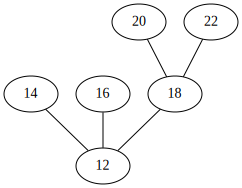

In [14]:
def func2(x, y):
    p = copy.deepcopy(x)
    p[1] += y[1]
    return p
root4 = root3.apply_pairwise(root2, lambda x,y: x[0] == y[0], func2)
root4.to_dot()

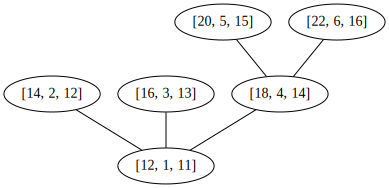

In [15]:
def check(infos):
    for info in infos:
        if info[0] != infos[0][0]:
            return False
    return True
def func(infos):
    return [infos[0][0], [x[1] for x in infos]]
root5 = apply_multiple_trees([root4, root2, root3], check=check, func=func)
root5.to_dot()

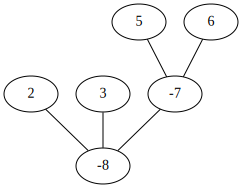

In [16]:
root2.apply_from_head_childs(lambda x, y: [x[0], x[1] - sum([a[1] for a in y])]).to_dot()